# Plankton Image Classification

## Data Exploration

#### Imports

In [1]:
%matplotlib inline
# For configuration and jupiter
import os
import sys
import re
import random
import matplotlib
import implicit
import warnings
# For data manipulation
import pandas as pd
import numpy as np
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For prediction
from tqdm import tqdm

import zipfile
from extract_zip import extract_zip_to_memory # function for decompressing zip in memory
from PIL import Image, ImageOps # image handling
from io import BytesIO # image handling

basepath = '/mnt/datasets/plankton/flowcam/'

# Nr of picture/rows = 243 611

In [2]:
# datasets
nativeDF = pd.read_csv(basepath + 'features_native.csv.gz')
skimagDF = pd.read_csv(basepath + 'features_skimage.csv.gz')
labelsDF = pd.read_csv(basepath + 'meta.csv')

In [3]:
print(nativeDF.width.max())
print(nativeDF.height.max())

972
739


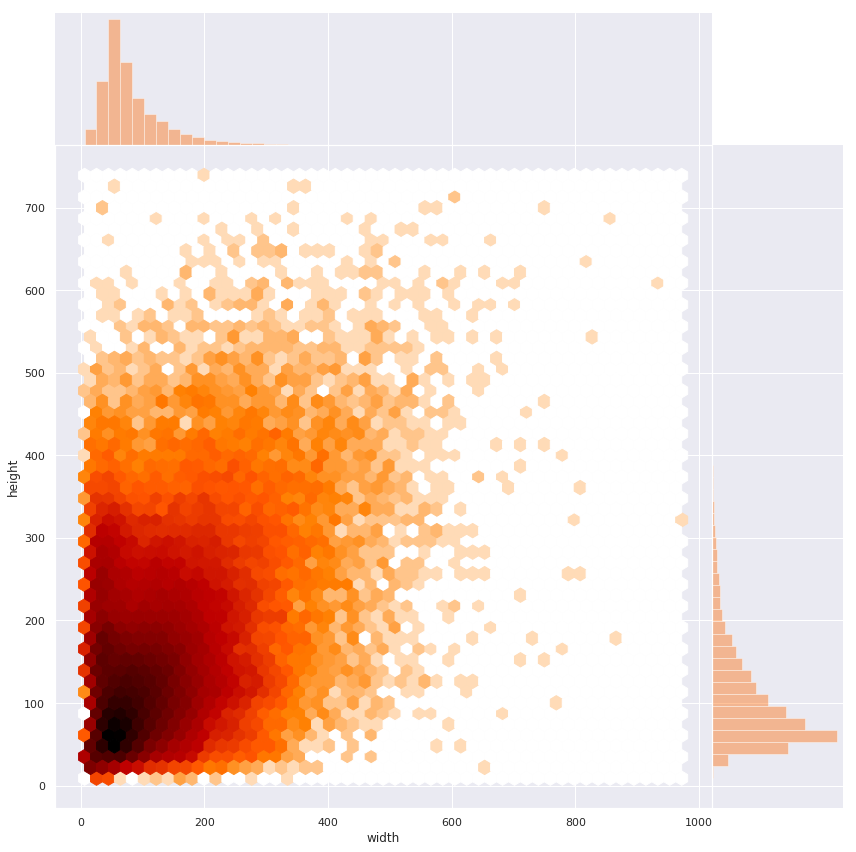

In [48]:
joint_kws=dict(gridsize=50, bins="log")
cmap=plt.cm.gist_heat_r
hexmap = sns.jointplot(nativeDF.width, nativeDF.height, kind='hex', space=0, color=cmap(.3), cmap=cmap, joint_kws=joint_kws, height=12)


In [34]:
number_unique_names = labelsDF.groupby('level2', as_index=True)['id'].count()
number_unique_names.sort_values(inplace=True, ascending=False)
unique_names = labelsDF.groupby('level2', as_index=False)['id'].count()
unique_names.sort_values(inplace=True, ascending=False, by='id')

print(unique_names.iloc[0])
print(unique_names.iloc[-1])


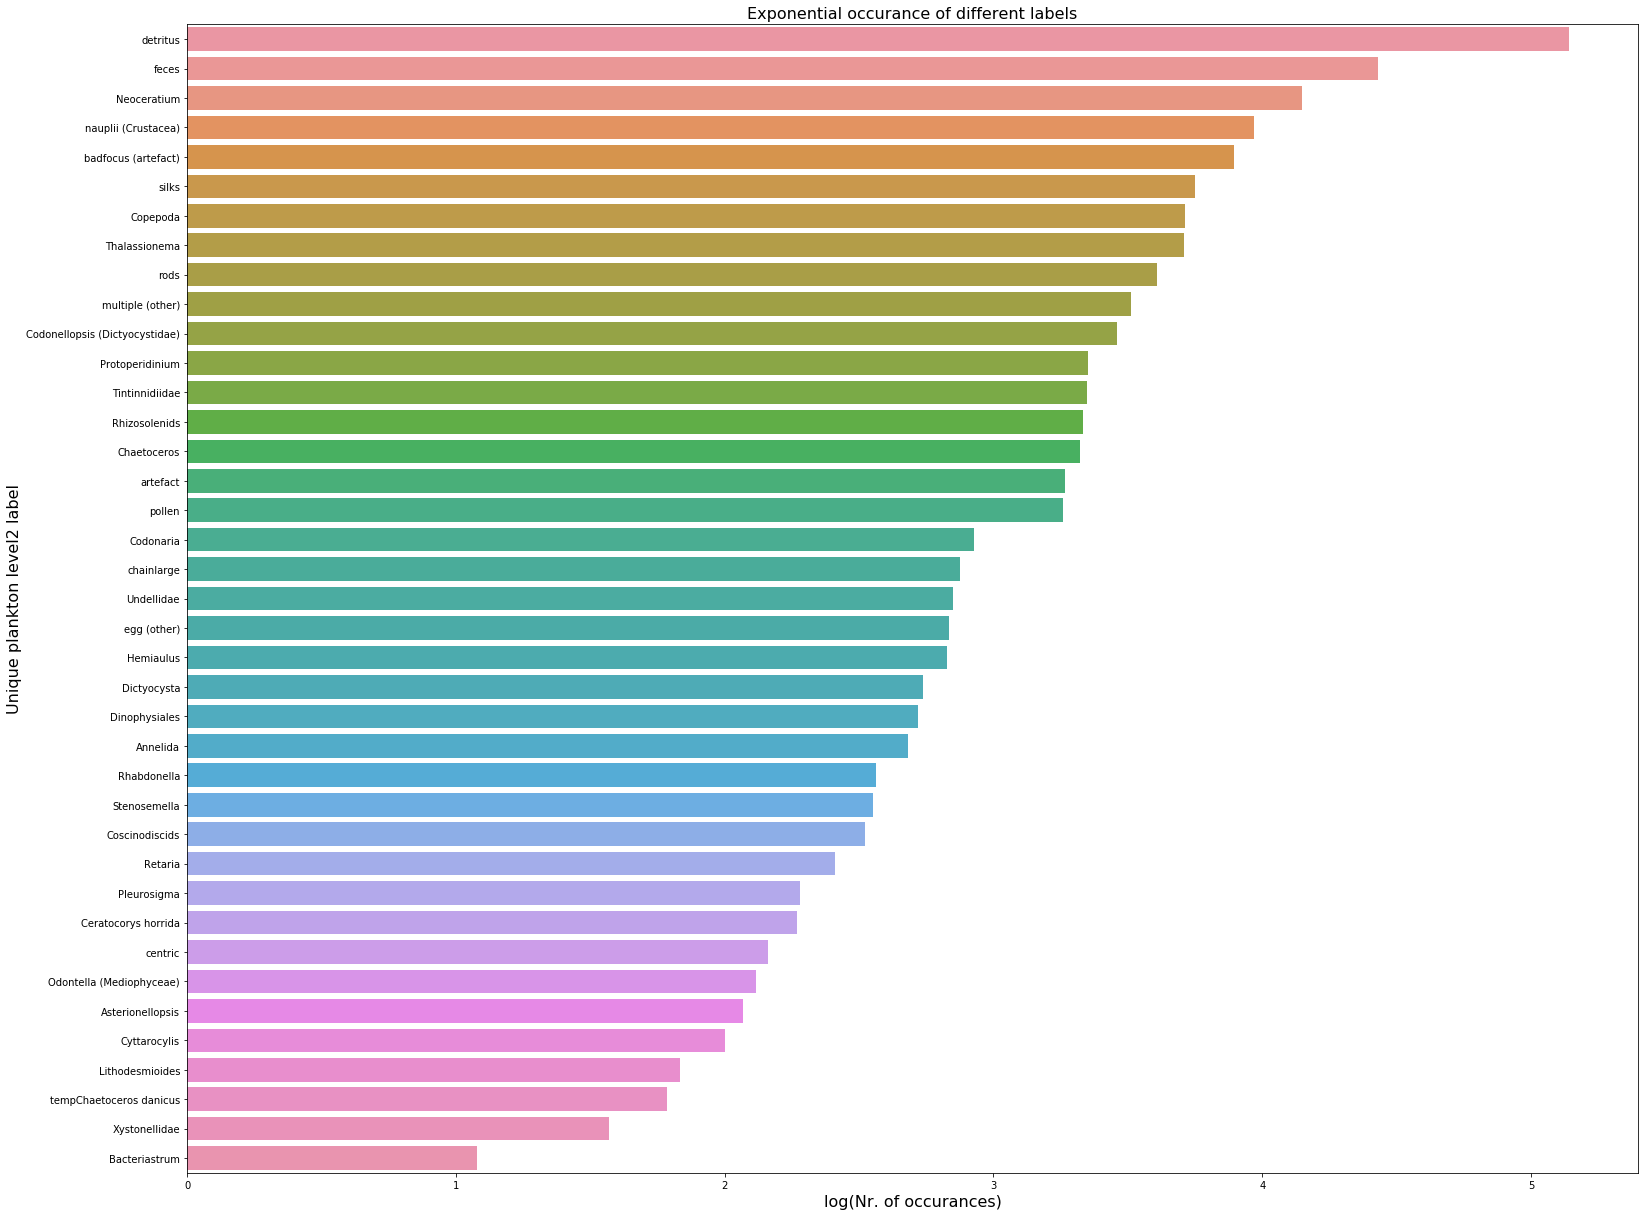

In [35]:
figure, ax = plt.subplots(figsize=(23,17))
ax = sns.barplot(y=number_unique_names.index, x=np.log10(number_unique_names.values))


plt.ylabel('Unique plankton level2 label', fontsize= 16)
plt.xlabel('log(Nr. of occurances)', fontsize= 16)
plt.title('Exponential occurance of different labels', fontsize=16)
plt.tight_layout()

In [36]:
unique_names = labelsDF.groupby('level2', as_index=False)['id'].count()
unique_names.sort_values(inplace=True, ascending=False, by='id')

print(unique_names.iloc[0])
print(unique_names.iloc[-1])

level2    detritus
id          138439
Name: 30, dtype: object
level2    Bacteriastrum
id                   12
Name: 2, dtype: object


The plot above shows the distribution of the different labels that the different images are assigned to. The x axis is exponential as the most numerous labels would completly dominate the plot otherwise. There is a big disparity in the labels as the least represented label (Bacteriastrum) only have 12 images and the most represented label (Detritus) have 138439 images. This will make classification difficult if it is left unaccounted for. 

## Data Pre-processing

## Model Selection

## Parameter Optimisation

## Model Evaluation